#1 Read the parser.txt file containing the image id and the respective word for that image and take the first 10000 instances for training and testing of the mode

Preprocessing the image and text data
Download data from https://drive.google.com/file/d/142gq5VFqCEgs1UGfmuDb6ianzALU44JF/view?usp=sharing

In [ ]:
!gdown --id 142gq5VFqCEgs1UGfmuDb6ianzALU44JF
!gdown --id 1lZA6WjzssJQYBEN7XLq4rhtxuRpqqmhT

Downloading...
From: https://drive.google.com/uc?id=142gq5VFqCEgs1UGfmuDb6ianzALU44JF
To: /content/words.tgz.zip
100% 820M/820M [00:05<00:00, 141MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1lZA6WjzssJQYBEN7XLq4rhtxuRpqqmhT
To: /content/parser.txt
100% 5.30M/5.30M [00:00<00:00, 19.9MB/s]


Unzip and extract the test image data


In [ ]:
!unzip words.tgz.zip
!tar -xvf words.tgz -C ./words

In [ ]:
import string
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences


Open the parser.txt file and read the data

In [ ]:
with open("parser.txt") as fp:
  parseData = fp.read().split('\n')
parseData[:10]

['a01-000u-00-00 ok 154 408 768 27 51 AT A',
 'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE',
 'a01-000u-00-02 ok 154 796 764 70 50 TO to',
 'a01-000u-00-03 ok 154 919 757 166 78 VB stop',
 'a01-000u-00-04 ok 154 1185 754 126 61 NPT Mr.',
 'a01-000u-00-05 ok 154 1438 746 382 73 NP Gaitskell',
 'a01-000u-00-06 ok 154 1896 757 173 72 IN from',
 'a01-000u-01-00 ok 156 395 932 441 100 VBG nominating',
 'a01-000u-01-01 ok 156 901 958 147 79 DTI any',
 'a01-000u-01-02 ok 156 1112 958 208 42 AP more']

### Check the data and load 10000 labels and filenames

In [ ]:
# check the data size
len(parseData)

lmt = 10000 if len(parseData) >= 10000 else len(parseData)
print(lmt) 


10000


In [ ]:

lmt = len(parseData)
curSize = 0
filenames = []
orgLables = []

for i in range(lmt):
  line = parseData[i].split(' ')
  name = line[0].split('-')
  status = line[1]
  if status != 'ok':
    continue
  filename = "/content/words/{}/{}-{}/{}.png".format(name[0],name[0],name[1],line[0])
  #print(filename)
  filenames.append(filename)
  orgLables.append(line[-1])
  curSize +=1
  if (curSize > 10000):
    break

len(filenames)
len(orgLables)

10001

#2. Images can be of different shape thus resize all your images to have the same shape(for example = (128,32)

#3 Currently,the pixel values are between 0 to 255, normalize the images so that the pixel values are in range 0 to 1

#4 Create a list of all characters and use the character’s index to encode the actual words into digits

#5 Pad all the words to have a similar length

#6 Split your dataset for training and testing



(51, 27)


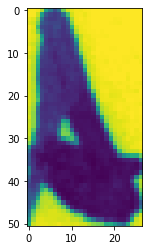

In [ ]:
img = cv2.imread(filenames[0], cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img)

(32, 128)
[[249 249 249 ... 251 251 251]
 [245 245 245 ... 251 251 251]
 [245 245 245 ... 251 251 251]
 ...
 [103 103 104 ... 143 146 146]
 [125 125 127 ... 233 234 234]
 [157 157 159 ... 241 242 242]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


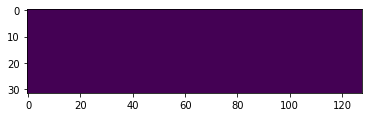

In [ ]:
img2 = cv2.resize(img, (128,32))
print(img2.shape)
plt.imshow(img2)
print(img2)
img2 = cv2.normalize(img2,(0,1))
print(img2)
plt.imshow(img2)

In [ ]:
def getRescaledSize(w, h):
  dh = 0
  dw = 0
  aspectRatio = w/h
  if h > 32 :
    #print("1")
    dh = 32
    dw = dh / aspectRatio
    #print("2")
    #print(dw, dh)
  if w > 128 :
    dw = 128
    dh = dw * aspectRatio
  
  if h <= 32 and w <= 128:
    dh = 32
    dw = dh / aspectRatio

  if dw > 128 :
    dw = 128
    dh = dw * aspectRatio
  if dh > 32 :
    dh = 32
    dw = dh / aspectRatio
  
  dh = int(dh)
  dw = int(dw)
  return (dw, dh)

In [ ]:
def resizeImageWithZeros(img, dw, dh):
  if dh < 32:
     add_zeros = np.ones((32-dh, dw))*255
     img = np.concatenate((img, add_zeros))

  if dw < 128:
    add_zeros = np.ones((32, 128-dw))*255
    img = np.concatenate((img, add_zeros), axis=1)
  return img


In [ ]:
def transformImage(imgPath):
  # read input image and convert into gray scale image
  try:
    img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    w, h = img.shape
    #print(w,h)
    #scale the image to 128x32
    dw, dh = getRescaledSize(w, h)
    #print(dw, dh)
    img = cv2.resize(img, (dw, dh))
  except NameError:
    print('Erorr')
    return 
  return resizeImageWithZeros(img, dw, dh)


In [ ]:
path = filenames[0]
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print(img.shape)
#print(plt.imshow(img))


(51, 27)


50 70
1
2
44.8 32
44 32
(32, 128)


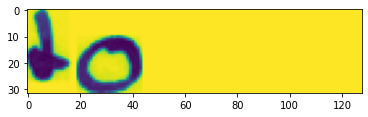

In [ ]:
path = filenames[2]
img = transformImage(path)
print(img.shape)
plt.imshow(img)


In [ ]:
char_list = string.ascii_letters+string.digits+ string.punctuation
 
def encodeLabels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)
        
    return dig_lst

In [ ]:
enTxt = encodeLabels(orgLables[1])
print(orgLables[1], enTxt)

MOVE [38, 40, 47, 30]


In [ ]:
def normalizeData(data):
  data = np.expand_dims(data , axis = 2)
        
  # Normalize the data
  data = data/255
  return data


In [ ]:
maxLen = 0
tImages = []
enc_lables = []
enc_lables_len= []
input_len = []

train_data = []
train_inputLen = []
train_labels = []
train_labelLen = []
org_txt = []

valid_data = []
valid_inputLen = []
valid_labels = []
valid_labelLen = []
valid_org_txt = []

for i in range(len(orgLables)):
  #transform the image
  
  try:
    img = transformImage(filenames[i])
  except AttributeError:
    print(i, filenames[i], AttributeError)
  else:
    #normalize
    imgData = normalizeData(img)
  
    #encode the labels
    encLab = encodeLabels(orgLables[i])

    tImages.append(imgData)
    org_txt.append(orgLables[i])
    enc_lables.append(encLab)
    enc_lables_len.append(len(encLab))
    input_len.append(31)

    # if i % 10 == 0 :
    #   valid_data.append(imgData)
    #   valid_org_txt.append(orgLables[i])
    #   valid_labels.append(encLab)
    #   valid_labelLen.append(len(encLab))
    #   valid_inputLen.append(31)
    # else:
    #   train_data.append(imgData)
    #   org_txt.append(orgLables[i])
    #   train_labels.append(encLab)
    #   train_labelLen.append(len(encLab))
    #   train_inputLen.append(31)


  maxLen = maxLen if maxLen > len(encLab) else len(encLab)




3600 /content/words/a01/a01-117/a01-117-05-02.png <class 'AttributeError'>


In [ ]:
from sklearn.model_selection import train_test_split

train_data, valid_data, org_txt, valid_org_txt, train_labels, valid_labels, train_labelLen, valid_labelLen,train_inputLen, valid_inputLen = train_test_split(tImages, org_txt,enc_lables,enc_lables_len,input_len, test_size=0.1)


#add the padding
train_padded_txt = pad_sequences(train_labels, maxlen=maxLen, padding='post', value = len(char_list))
valid_padded_txt = pad_sequences(valid_labels, maxlen=maxLen, padding='post', value = len(char_list))


In [ ]:
len(train_data)
len(valid_data)

1000

# Create the model - CNN + BiLSTM
#7 Create a model for training
a)Add several CNN layers to extract the sequence of features

b)Add Bi-LSTM layers to propagate through the sequence

c)Add a dense layer(output layer) with total number of neurons as (total number of characters + 1) and the activation as softmax.

#8 The output sequence from the output layer will be fed to the CTC layer

#9 Predict output using your model(do notuse the last loss layer) on validation images, use ctc_decodeto decode your output and then print the actual words using the indexes from your character’s list.

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense,Lambda, BatchNormalization, Conv2D, Flatten, Dropout, MaxPool2D, Activation, Input
import keras.backend as K
from keras.models import Model
from keras.callbacks import ModelCheckpoint


In [ ]:
tensorflow.__version__

'2.6.0'

In [ ]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Sat Oct 16 16:49:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    71W / 149W |    183MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
inputs = Input(shape=(32,128,1))

# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
# poolig layer with kernel size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)

conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)

conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)

conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)
# poolig layer with kernel size (2,1)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)

conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)
# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)

conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)

conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)

squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)

# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(blstm_1)

char_list = string.ascii_letters + string.digits + string.punctuation

outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

act_model = Model(inputs, outputs)

In [ ]:
act_model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 128, 1)]      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 128, 64)       640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 64, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 32, 128)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 32, 256)        295168    
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 32, 256)        5900

In [ ]:
labels = Input(name='the_labels', shape=[maxLen], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
 
def ctc_lambda_func(args):
  y_pred, labels, input_length, label_length = args
  return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
 
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [ ]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')
 
filepath="best_model.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [ ]:
training_img = np.array(train_data)
train_inputLen = np.array(train_inputLen)
train_labelLen = np.array(train_labelLen)

valid_img = np.array(valid_data)
valid_inputLen = np.array(valid_inputLen)
valid_labelLen = np.array(valid_labelLen)

In [ ]:
batch_size = 256
epochs = 20
model.fit(x=[training_img, train_padded_txt, train_inputLen, train_labelLen],
          y=np.zeros(len(training_img)),
          batch_size=batch_size,
          epochs = epochs, 
          validation_data = ([valid_img, valid_padded_txt, valid_inputLen, valid_labelLen], [np.zeros(len(valid_img))]),
          verbose = 1,
          callbacks = callbacks_list)


Epoch 1/20
36/36 [==============================] - 22s 601ms/step - loss: 14.4515 - val_loss: 14.2461

Epoch 00001: val_loss improved from 14.63266 to 14.24605, saving model to best_model.hdf5
Epoch 2/20
36/36 [==============================] - 22s 598ms/step - loss: 14.1561 - val_loss: 14.3249

Epoch 00002: val_loss did not improve from 14.24605
Epoch 3/20
36/36 [==============================] - 22s 600ms/step - loss: 13.7645 - val_loss: 16.8028

Epoch 00003: val_loss did not improve from 14.24605
Epoch 4/20
36/36 [==============================] - 22s 601ms/step - loss: 13.3384 - val_loss: 22.1624

Epoch 00004: val_loss did not improve from 14.24605
Epoch 5/20
36/36 [==============================] - 22s 600ms/step - loss: 12.7659 - val_loss: 20.7416

Epoch 00005: val_loss did not improve from 14.24605
Epoch 6/20
36/36 [==============================] - 22s 603ms/step - loss: 12.2549 - val_loss: 21.1545

Epoch 00006: val_loss did not improve from 14.24605
Epoch 7/20
36/36 [========

In [ ]:
act_model.load_weights("best_model.hdf5")
prediction = act_model.predict(valid_img[:10])
out = K.get_value(K.ctc_decode(prediction, 
                               input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                               greedy=True)[0][0])

In [ ]:
# see the results
i = 0
for x in out:
    print("original_text =  ", valid_org_txt[i])
    print("predicted text = ", end = '')
    
    for p in x:  
        if int(p) != -1:
            print(char_list[int(p)], end = '')       
    print('\n')
    i+=1

original_text =   Watford
predicted text = t

original_text =   was
predicted text = t

original_text =   my
predicted text = t

original_text =   more
predicted text = t

original_text =   Today
predicted text = t

original_text =   likely
predicted text = t

original_text =   eventual
predicted text = t

original_text =   his
predicted text = t

original_text =   former
predicted text = t

original_text =   of
predicted text = t

